<a href="https://colab.research.google.com/github/thetjswo/AIFFEL_Online_Quest_claireyy01/blob/main/MainQuest01/MainQuest_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Quest2

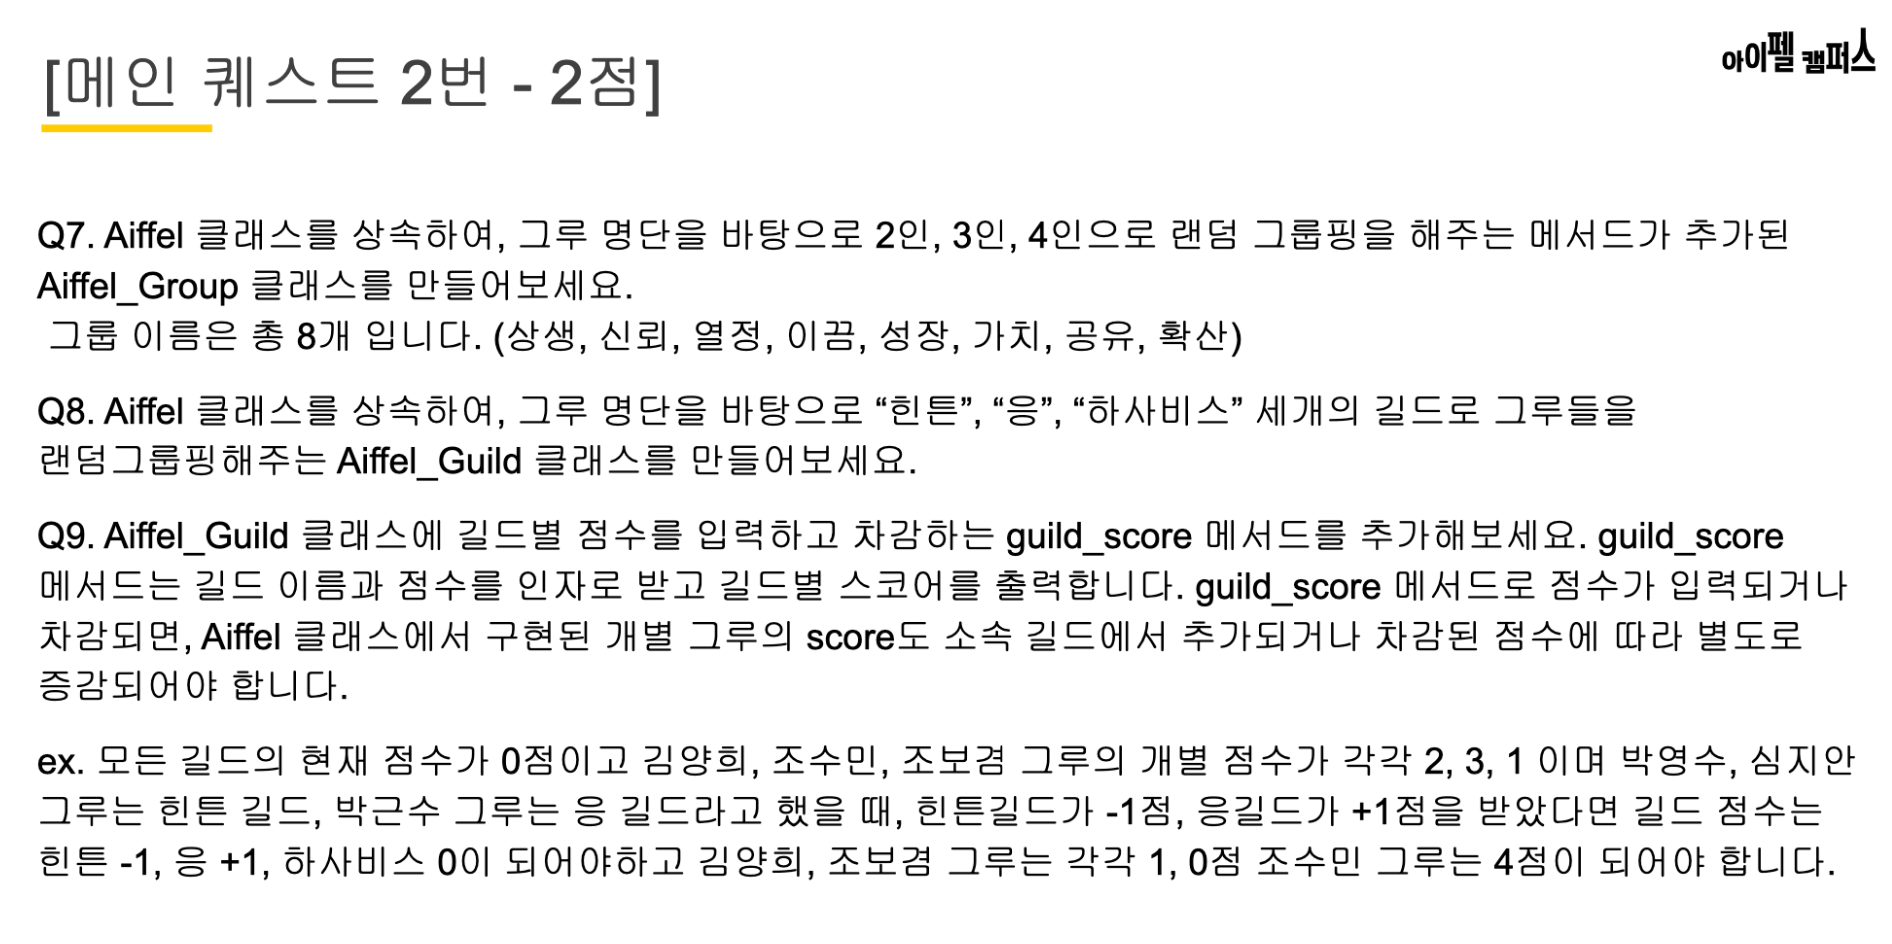


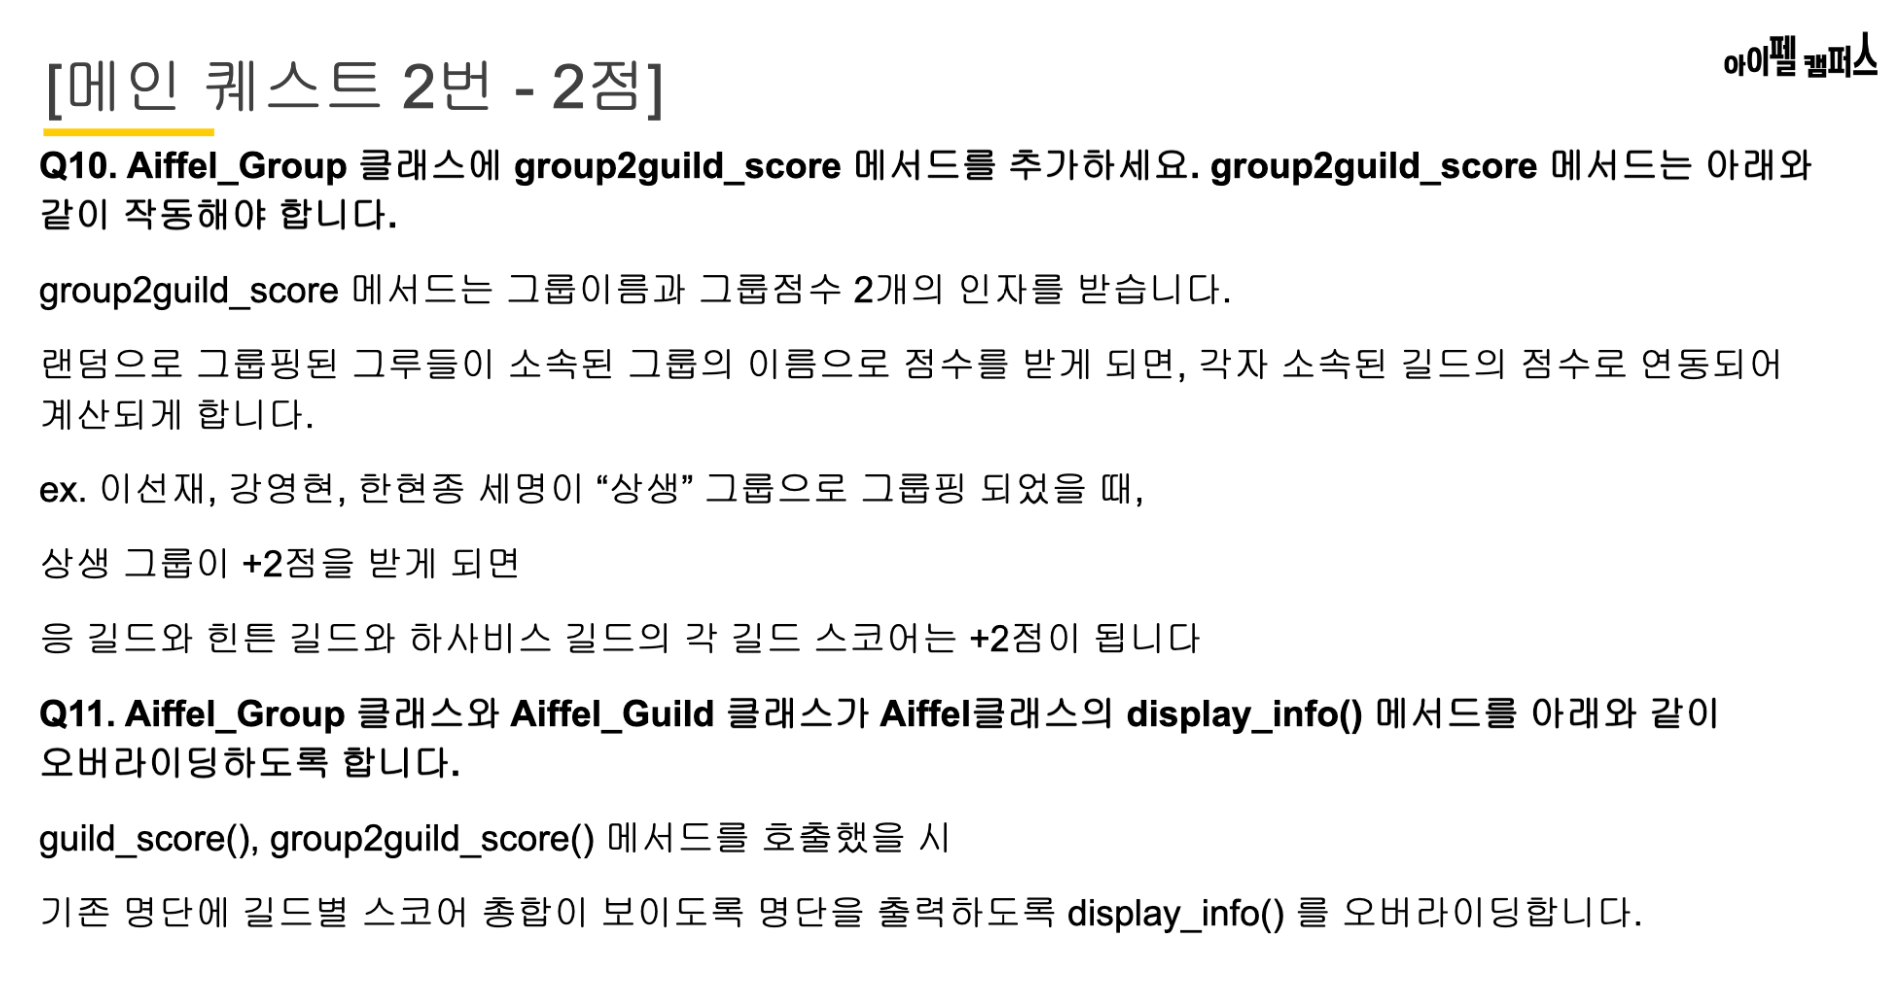
---

# Q1 코어 명단(딕셔너리)를 입력받아 학번을 부여하는 초기화 메서드를 작성해보세요.

In [ ]:
class Aiffel:
    list_status = 0
    core_mem = {}
    std_num_cnt = 0

    def __init__(self, nm, ent, th, crs):
        # 이름 속성
        self.nm = nm
        # 입학연도 속성
        self.ent = ent
        # 기수 속성
        self.th = th
        # 과정 속성
        self.crs = crs


        # 코어 명단 최초 1회만 입력
        if Aiffel.list_status == 0:
            for i in range(18):
                k = input('그루명 입력: ')
                # 01~09로 저장
                if i + 1 < 10:
                    v = '0' + str(i + 1)
                else:
                    v = str(i + 1)

                Aiffel.core_mem[k] = v

            Aiffel.list_status = 1

        # 기수 코드 치환
        if self.th == '온라인 7기':
            nn = '29'
        elif self.th == '온라인 6기':
            nn = '28'
        else:
            nn = '27'

        # 과정 코드 치환
        if self.crs == '코어':
            c = '2'
        else:
            c = '1'

        # 순번 코드
        for k, v in Aiffel.core_mem.items():
            if self.nm == k:
                xx = v

        # 학번 생성
        self.std_num = self.ent[2:] + nn + c + xx
        print(self.std_num)

        Aiffel.std_num_cnt += 1



grew1 = Aiffel('이선재','2023','온라인 7기', '코어')
grew2 = Aiffel('한현종','2023','온라인 7기', '코어')
grew3 = Aiffel('강영현','2023','온라인 7기', '코어')

grew = [grew1, grew2, grew3]

# Q2 Aiffel 클래스로부터 생성된 학번의 개수를 출력하는 get_id_num() 메서드를 추가하세요.

In [ ]:
# 학번 개수 출력 메서드
def get_id_num(self):
    return print(f'학번의 개수는 {Aiffel.std_num_cnt}개 입니다.')


# 학번 개수 확인
grew1.get_id_num()

#Q3 Aiffel 클래스에 퀘스트 점수 입력을 위한 score 메서드를 추가하세요, 점수는 +1점 부터 +3점까지만 가능합니다.

In [ ]:
# 점수 입력 메서드
    def score(self):
        try:
            # 재입력 상황 대비 스코어를 0으로 초기화
            quest_score = 0

            while quest_score < 1 or quest_score > 3:
                quest_score = int(input('퀘스트 점수를 입력하세요(1~3): '))

                # 점수가 1~3 사이인지 검증
                if 1 <= quest_score <= 3:
                    # 개인 퀘스트 총점
                    self.psn_score += quest_score
                    # 입력된 퀘스트 점수 총점
                    self.psn_score_sum += quest_score

                    return True
                else:
                    # 범위 내의 점수 입력 유도
                    print('점수는 1~3점으로 입력하세요.')

        except:
            # 정수형 점수 입력 유도
            print('점수는 1~3까지의 정수로 입력하세요.')

            return False


# 퀘스트 점수 입력 메서드 호출
for i in grew:
    score_status = False
    # return 값이 True일 때까지 반복
    while score_status == False:
        # 점수 정상 입력 시 종료
        if i.score() == True:
            break


# Q4 Aiffel 클래스에 퀘스트 점수 차감을 위한 penalty 메서드를 추가 하세요. penalty로 인한 잔여 점수는 음수가 가능합니다.

In [ ]:
# 패널티 메서드 정의
    def penality(self):
        # 퀘스트 점수는 음수가 될 수 있다.
        try:
            penalty_score = int(input('부여할 패널티 점수를 입력하세요: '))
            # 점수 총점 업데이트
            self.psn_score -= penalty_score
            # 패널티 점수 총점 업데이트
            self.psn_penalty_sum += penalty_score

            return True
        except:
            # 정수형 점수 입력 유도
            print('점수는 정수로만 입력하세요.')

            return False


# 페널티 점수 입력 메서드 호출
for i in grew:
    penalty_status = False
    # return 값이 True일 때까지 반복
    while penalty_status == False:
        # 점수 정상 입력 시 종료
        if i.penality() == True:
            break

# Q5

In [ ]:
# 객체 정보 호출 메서드 정의
    def display_info(self):
        # csv 파일에 입력할 데이터 리스트 생성
        list = [self.nm, self.std_num, self.crs, self.psn_score, self.psn_score_sum,self.psn_penalty_sum]

        return list



for i in grew:
    row_list.append(i.display_info())
with open('grew_data.csv','w',newline='') as f:
    writer = csv.writer(f)
    # 1행에 필드 추가
    writer.writerow(field_list)
    # 2행부터 로우 추가
    writer.writerows(row_list)

# Q6

In [ ]:
# 중도 포기 그루 삭제 메서드 정의
    def delete_grew(self, name):
        # name 키와 그 키의 밸류 삭제
        del Aiffel.core_mem[name]

        #삭제된 인원 뒤에 있는 그루들의 순번이 바뀌게 되면 학번도 바뀌어야 하므로 순번은 유지
        return print(f'갱신된 그루 목록은 {Aiffel.core_mem}입니다.')


# 김경민, 김영신 그루 삭제
grew1.delete_grew('김경민')
grew1.delete_grew('김영신')

# Q7

In [ ]:
# Aiffel_Group 클래스 정의
class AiffelGroup(Aiffel):
    def __init__(self):
        # grew_dic = Aiffel.core_mem
        # 그루 이름으로 구성된 리스트 생성
        self.grew_mem = [i for i in Aiffel.dev]
        self.group_nm = {'상생': '', '신뢰': '', '열정': '', '이끔': '', '성장': '', '가치': '', '공유': '', '확산': ''}

        for k,v in self.group_nm.items():
            # 인덱스 별 value에 2~4명의 랜덤 그루 배정
            if len(self.grew_mem) >= 4:
                self.group_nm[k] = random.sample(self.grew_mem, random.randint(2, 4))
                # 배정된 그루는 리스트에서 제거
                for x in self.group_nm[k]:
                    self.grew_mem.remove(x)
            else:
                # 나머지 연산
                self.group_nm[k] = self.grew_mem
        return print(f'추첨된 조는 {self.group_nm} 입니다.')



aiffel_group = AiffelGroup()

# Q8

In [ ]:
# Aiffel_Guild 클래스 정의
class AiffelGuild(Aiffel):
    def __init__(self):
        # grew_dic = Aiffel.core_mem
        # 그루 이름으로 구성된 리스트 생성
        self.grew_mem = [i for i in Aiffel.dev]
        self.guild_nm = {'힌튼': '', '응': '', '하사비스': ''}

        # 인덱스 별 value에 5~6명의 랜덤 그루 배정
        for k,v in self.guild_nm.items():
            if len(self.grew_mem) >= 6:
                self.guild_nm[k] = random.sample(self.grew_mem, random.randint(5, 6))
                # 배정된 그루는 리스트에서 제거
                for x in self.guild_nm[k]:
                    self.grew_mem.remove(x)
            else:
                # 나머지 연산
                self.guild_nm[k] = self.grew_mem
        return print(f'추첨된 길드는 {self.guild_nm}입니다.')


aiffel_guild = AiffelGuild()

# Q9

In [ ]:
    def guild_score(self, name, score, grew):
        for i in self.guild_nm:
            # 입력 받은 길드 이름과 딕셔너리 인덱스의 키 값이 같을 때
            if name == i:
                # 길드 점수 갱신
                self.guild_scr += score

                # 이중 for문으로 그루 이름 비교
                for x in self.guild_nm[i]:
                    for y in grew:
                        if x == y.nm:
                            # 매개변수로 넘어온 점수가 음수일 경우
                            if score < 0:
                                # 총점 갱신
                                y.psn_score += score
                                # 패널티 총점 갱신
                                y.psn_penalty_sum -= score
                            # 매개변수로 넘어온 점수가 양수일 경우
                            else:
                                # 총점 갱신
                                y.psn_score += score
                                # 합산 점수 갱신
                                y.psn_score_sum += score
                            print(f'{i} 길드의 {y.nm} 그루는 {score} 점 획득했으므로, 현재 {y.psn_score}점입니다..')


# 길드 점수 갱신 메서드 호출
aiffel_guild.guild_score('응',-1,grew)

# Q10

In [ ]:
    # 조별 점수 - 길드 점수 연동 메서드
    def group2guild_score(self, name, score, guild, grew):
        for i in self.group_nm:
            # 조 이름 검증
            if name == i:
                # 길드 검증
                for x in self.group_nm[i]:
                    # x == 그루 이름
                    for y in guild.guild_nm:
                        # y == 길드명
                        for z in guild.guild_nm[y]:
                            if x == z:
                                # 길드 점수 갱신 메서드 호출
                                return guild.guild_score(y,score,grew)


# 그룹 점수 갱신 메서드 호출
aiffel_group.group2guild_score('상생',3,aiffel_guild, grew)

# 최종

In [11]:
# csv 모듈 import
import csv
import random

#Aiffel 클래스 정의
class Aiffel:
    list_status = 0
    core_mem = {}
    std_num_cnt = 0

    def __init__(self, nm, ent, th, crs):
        # 이름 속성
        self.nm = nm
        # 입학연도 속성
        self.ent = ent
        # 기수 속성
        self.th = th
        # 과정 속성
        self.crs = crs
        # 퀘스트 점수 총점
        self.psn_score = 0
        # 퀘스트 입력 총점
        self.psn_score_sum = 0
        # 퀘스트 페널티 총점
        self.psn_penalty_sum = 0


        # 코어 명단 최초 1회만 입력
        if Aiffel.list_status == 0:
            for i in range(18):
                k = input('그루명 입력: ')
                # 01~09로 저장
                if i + 1 < 10:
                    v = '0' + str(i + 1)
                else:
                    v = str(i + 1)

                Aiffel.core_mem[k] = v

            Aiffel.list_status = 1

        # 기수 코드 치환
        if self.th == '온라인 7기':
            nn = '29'
        elif self.th == '온라인 6기':
            nn = '28'
        else:
            nn = '27'

        # 과정 코드 치환
        if self.crs == '코어':
            c = '2'
        else:
            c = '1'

        # 순번 코드
        for k, v in Aiffel.core_mem.items():
            if self.nm == k:
                xx = v

        # 학번 생성
        self.std_num = self.ent[2:] + nn + c + xx
        print(self.std_num)

        Aiffel.std_num_cnt += 1

    # 학번 개수 출력 메서드 정의
    def get_id_num(self):
        return print(f'학번의 개수는 {Aiffel.std_num_cnt}개 입니다.')

    # 점수 입력 메서드 정의
    def score(self):
        try:
            # 재입력 상황 대비 스코어를 0으로 초기화
            quest_score = 0

            while quest_score < 1 or quest_score > 3:
                quest_score = int(input(f'{self.nm} 그루에게 부여할 퀘스트 점수를 입력하세요(1~3): '))

                # 점수가 1~3 사이인지 검증
                if 1 <= quest_score <= 3:
                    # 개인 퀘스트 총점
                    self.psn_score += quest_score
                    # 입력된 퀘스트 점수 총점
                    self.psn_score_sum += quest_score

                    return True
                else:
                    # 범위 내의 점수 입력 유도
                    print('점수는 1~3점으로 입력하세요.')

        except:
            # 정수형 점수 입력 유도
            print('점수는 1~3까지의 정수로 입력하세요.')

            return False

    # 패널티 메서드 정의
    def penality(self):
        # 퀘스트 점수는 음수가 될 수 있다.
        try:
            penalty_score = int(input(f'{self.nm} 그루에게 부여할 패널티 점수를 입력하세요: '))
            # 점수 총점 업데이트
            self.psn_score -= penalty_score
            # 패널티 점수 총점 업데이트
            self.psn_penalty_sum += penalty_score

            return True
        except:
            # 정수형 점수 입력 유도
            print('점수는 정수로만 입력하세요.')

            return False

    # 객체 정보 호출 메서드 정의
    def display_info(self):
        # csv 파일에 입력할 데이터 리스트 생성
        list = [self.nm, self.std_num, self.crs, self.psn_score, self.psn_score_sum,self.psn_penalty_sum]

        return list

    # 중도 포기 그루 삭제 메서드 정의
    def delete_grew(self, name):
        # name 키와 그 키의 밸류 삭제
        del Aiffel.core_mem[name]

        #삭제된 인원 뒤에 있는 그루들의 순번이 바뀌게 되면 학번도 바뀌어야 하므로 순번은 유지
        return print(f'갱신된 그루 목록은 {Aiffel.core_mem}입니다.')


# Aiffel_Group 클래스 정의
class AiffelGroup(Aiffel):
    def __init__(self):
        # 그루 이름으로 구성된 리스트 생성
        self.grew_mem = [i for i in Aiffel.core_mem]
        self.group_nm = {'상생': '', '신뢰': '', '열정': '', '이끔': '', '성장': '', '가치': '', '공유': '', '확산': ''}

        for k,v in self.group_nm.items():
            # 인덱스 별 value에 2~4명의 랜덤 그루 배정
            if len(self.grew_mem) >= 4:
                self.group_nm[k] = random.sample(self.grew_mem, random.randint(2, 4))
                # 배정된 그루는 리스트에서 제거
                for x in self.group_nm[k]:
                    self.grew_mem.remove(x)
            else:
                # 나머지 연산
                self.group_nm[k] = self.grew_mem
        return print(f'추첨된 조는 {self.group_nm} 입니다.')

    # 조별 점수 - 길드 점수 연동 메서드
    def group2guild_score(self, name, score, guild, grew):
        for i in self.group_nm:
            # 조 이름 검증
            if name == i:
                # 길드 검증
                for x in self.group_nm[i]:
                    # x == 그루 이름
                    for y in guild.guild_nm:
                        # y == 길드명
                        for z in guild.guild_nm[y]:
                            if x == z:
                                # 길드 점수 갱신 메서드 호출
                                return guild.guild_score(y,score,grew)





# Aiffel_Guild 클래스 정의
class AiffelGuild(Aiffel):
    def __init__(self):
        # 길드 스코어 속성
        self.guild_scr = 0
        # 그루 이름으로 구성된 리스트 생성
        self.grew_mem = [i for i in Aiffel.core_mem]
        self.guild_nm = {'힌튼': '', '응': '', '하사비스': ''}

        # 인덱스 별 value에 5~6명의 랜덤 그루 배정
        for k,v in self.guild_nm.items():
            if len(self.grew_mem) >= 6:
                self.guild_nm[k] = random.sample(self.grew_mem, random.randint(5, 6))
                # 배정된 그루는 리스트에서 제거
                for x in self.guild_nm[k]:
                    self.grew_mem.remove(x)
            else:
                # 나머지 연산
                self.guild_nm[k] = self.grew_mem
        return print(f'추첨된 길드는 {self.guild_nm}입니다.')

    def guild_score(self, name, score, grew):
        for i in self.guild_nm:
            # 입력 받은 길드 이름과 딕셔너리 인덱스의 키 값이 같을 때
            if name == i:
                # 길드 점수 갱신
                self.guild_scr += score

                # 이중 for문으로 그루 이름 비교
                for x in self.guild_nm[i]:
                    for y in grew:
                        if x == y.nm:
                            # 매개변수로 넘어온 점수가 음수일 경우
                            if score < 0:
                                # 총점 갱신
                                y.psn_score += score
                                # 패널티 총점 갱신
                                y.psn_penalty_sum -= score
                            # 매개변수로 넘어온 점수가 양수일 경우
                            else:
                                # 총점 갱신
                                y.psn_score += score
                                # 합산 점수 갱신
                                y.psn_score_sum += score
                            print(f'{i} 길드의 {y.nm} 그루는 {score} 점 획득했으므로, 현재 {y.psn_score}점입니다.')












# 그루 객체 생성
grew1 = Aiffel('이선재','2023','온라인 7기', '코어')
grew2 = Aiffel('한현종','2023','온라인 7기', '코어')
grew3 = Aiffel('강영현','2023','온라인 7기', '코어')

grew = [grew1, grew2, grew3]

# 학번 개수 확인
grew1.get_id_num()

# 퀘스트 점수 입력 메서드 호출
for i in grew:
    score_status = False
    # return 값이 True일 때까지 반복
    while score_status == False:
        # 점수 정상 입력 시 종료
        if i.score() == True:
            break

# 페널티 점수 입력 메서드 호출
for i in grew:
    penalty_status = False
    # return 값이 True일 때까지 반복
    while penalty_status == False:
        # 점수 정상 입력 시 종료
        if i.penality() == True:
            break


# csv 파일 출력
# 필드 리스트 생성
field_list = ['이름','학번','과정','퀘스트 총점','퀘스트 입력 총점','퀘스트 패널티 총점']
# 빈 로우 리스트 생성
row_list = []

# 각 객체 정보 리스트에 추가
for i in grew:
    row_list.append(i.display_info())
with open('/content/grew_data.csv','w',newline='') as f:
    writer = csv.writer(f)
    # 1행에 필드 추가
    writer.writerow(field_list)
    # 2행부터 로우 추가
    writer.writerows(row_list)

# 김경민, 김영신 그루 삭제
grew1.delete_grew('김경민')
grew1.delete_grew('김영신')

aiffel_group = AiffelGroup()
aiffel_guild = AiffelGuild()

# 길드 점수 갱신 메서드 호출
aiffel_guild.guild_score('응',-1,grew)

# 그룹 점수 갱신 메서드 호출
aiffel_group.group2guild_score('상생',3,aiffel_guild, grew)


그루명 입력: 강영현
그루명 입력: 김경민
그루명 입력: 김민기
그루명 입력: 김승순
그루명 입력: 김양희
그루명 입력: 김영신
그루명 입력: 오우진
그루명 입력: 윤혜윤
그루명 입력: 이상원
그루명 입력: 이선재
그루명 입력: 이슬
그루명 입력: 이승환
그루명 입력: 전민규
그루명 입력: 조보겸
그루명 입력: 조수민
그루명 입력: 최강훈
그루명 입력: 한현종
그루명 입력: 홍채림
2329210
2329217
2329201
학번의 개수는 3개 입니다.
이선재 그루에게 부여할 퀘스트 점수를 입력하세요(1~3): 3
한현종 그루에게 부여할 퀘스트 점수를 입력하세요(1~3): 3
강영현 그루에게 부여할 퀘스트 점수를 입력하세요(1~3): 3
이선재 그루에게 부여할 패널티 점수를 입력하세요: 1
한현종 그루에게 부여할 패널티 점수를 입력하세요: 1
강영현 그루에게 부여할 패널티 점수를 입력하세요: 1
갱신된 그루 목록은 {'강영현': '01', '김민기': '03', '김승순': '04', '김양희': '05', '김영신': '06', '오우진': '07', '윤혜윤': '08', '이상원': '09', '이선재': '10', '이슬': '11', '이승환': '12', '전민규': '13', '조보겸': '14', '조수민': '15', '최강훈': '16', '한현종': '17', '홍채림': '18'}입니다.
갱신된 그루 목록은 {'강영현': '01', '김민기': '03', '김승순': '04', '김양희': '05', '오우진': '07', '윤혜윤': '08', '이상원': '09', '이선재': '10', '이슬': '11', '이승환': '12', '전민규': '13', '조보겸': '14', '조수민': '15', '최강훈': '16', '한현종': '17', '홍채림': '18'}입니다.
추첨된 조는 {'상생': ['조보겸', '한현종', '이상원', '이승환'], '신뢰': ['오우진', '최강훈', '이슬'], '열정': ['강영현', '조수민'